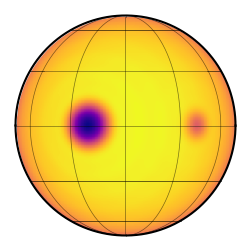

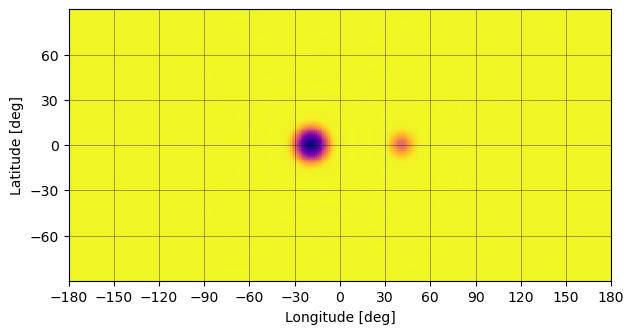

In [2]:
import starry
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import animation

import theano
theano.config.gcc__cxxflags += " -fexceptions"

starry.config.lazy = False
starry.config.quiet = True




map = starry.Map(ydeg=30,udeg=2)
map[1]=0.05
map[2]=0.15

contrast = 0.45
radius = 10
lat=0
lon=-20
map.spot(contrast=contrast, radius=radius, lat=lat , lon = lon)


contrast = 0.30
radius = 5
lat=0
lon=40
map.spot(contrast=contrast, radius=radius, lat=lat , lon = lon)
map.show()

map.show(projection='rect')

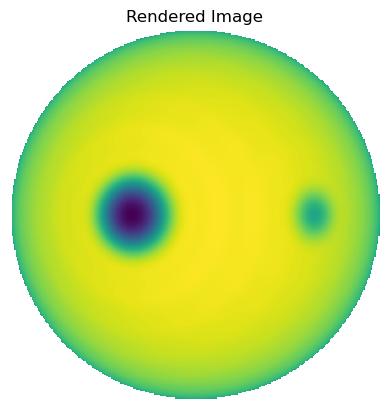

In [3]:
img_array=map.render(res=300,projection='ortho',theta=0.0)
#Plot img_array as an image
plt.imshow(img_array)
plt.axis('off') # Turn off axis labels and ticks
plt.title("Rendered Image") # Add a title (optional)
plt.show()

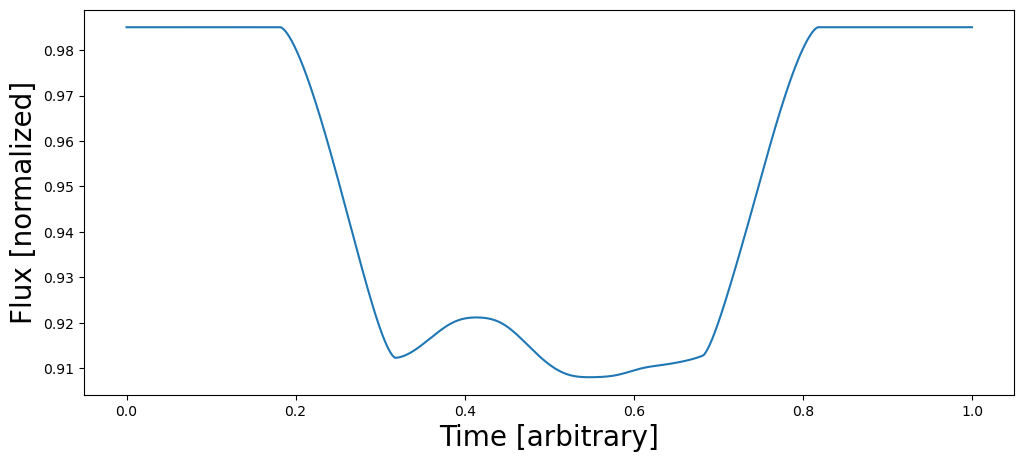

In [4]:
# Set the occultor trajectory
npts = 1000
time = np.linspace(0, 1, npts)
xo = np.linspace(-2.0, 2.0, npts)
# yo = np.linspace(-0.3, 0.3, npts)
yo=  np.zeros_like(xo)
zo = 1.0
ro = 0.272

# # Load the map of the Earth
# map = starry.Map(ydeg=20)
# map.load("earth", sigma=0.08)

# Compute and plot the light curve
plt.figure(figsize=(12, 5))
flux_moon = map.flux(xo=xo, yo=yo, ro=ro, zo=zo)
plt.plot(time, flux_moon)
plt.xlabel("Time [arbitrary]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20)

# flux_moon as light_curve_1
light_curve_1 = flux_moon
np.save("light_curve_1.npy", light_curve_1)
np.save("time_lc_1.npy", time)

plt.show() # Add this line to display the plot if you haven't already

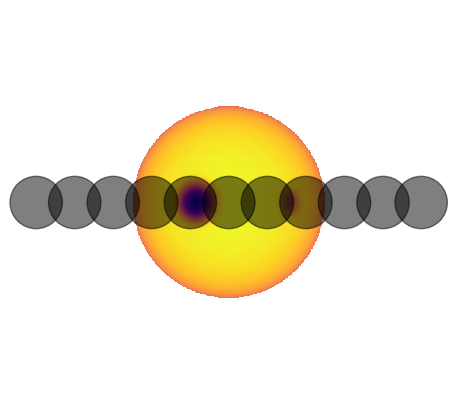

In [5]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.axis("off")
ax.imshow(map.render(), origin="lower", cmap="plasma", extent=(-1, 1, -1, 1))
for n in list(range(0, npts, npts // 10)) + [npts - 1]:
    circ = plt.Circle(
        (xo[n], yo[n]), radius=ro, color="k", fill=True, clip_on=False, alpha=0.5
    )
    ax.add_patch(circ)